# **Árbol de Decisión**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : Árbol de Decisión en la clasificación de dureza
```

## **Árbol de Decisión**
Prueba de un árbol de decisión con el dataset de microorganismos.</br>
El criterio para la constrcción del árbol es el de gini con una profundidad considerable.</br>
Se incluye la etapa de test y predicción, así como el cálculo de las métricas respectivas.

## **1. Librerias a utilizar**

In [1]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.tree import DecisionTreeClassifier

## **2. Leer datos**

In [2]:
datos = pd.read_csv('dureza.csv', sep=',')
datos.head(10)

,PC,PMg,PP,PS,Psi,Pti,PNb,PCr,PBr,Pal,PV,Pcu,PCl,Pni,Pmo,Pn,Dureza
0,0.243,1.27,0.015,0.0080,0.112,0.009,0.001,0.03,0.0004,0.039,0.003,0.03,0.0019,0.03,0.007,0.0058,293
1,0.231,1.26,0.015,0.0080,0.128,0.012,0.009,0.02,0.0005,0.028,0.003,0.01,0.0028,0.02,0.007,0.0035,293
2,0.220,1.26,0.017,0.0046,0.129,0.013,0.001,0.03,0.0004,0.044,0.004,0.03,0.0023,0.03,0.010,0.0048,293
3,0.230,1.26,0.014,0.0040,0.130,0.013,0.002,0.01,0.0003,0.027,0.001,0.01,0.0022,0.01,0.003,0.0064,293
4,0.232,1.26,0.012,0.0073,0.135,0.011,0.001,0.02,0.0005,0.045,0.003,0.02,0.0026,0.02,0.010,0.0065,293
5,0.232,1.27,0.013,0.0035,0.150,0.014,0.002,0.01,0.0003,0.029,0.002,0.01,0.0032,0.01,0.001,0.0060,293
6,0.232,1.27,0.013,0.0035,0.150,0.014,0.002,0.01,0.0003,0.029,0.002,0.01,0.0032,0.01,0.001,0.0060,293
7,0.230,1.26,0.014,0.0040,0.130,0.013,0.002,0.01,0.0003,0.027,0.001,0.01,0.0022,0.01,0.003,0.0064,293
8,0.227,1.28,0.023,0.0072,0.103,0.012,0.005,0.04,0.0004,0.033,0.008,0.02,0.0022,0.04,0.015,0.0046,293
9,0.239,1.25,0.018,0.0080,0.109,0.014,0.004,0.05,0.0005,0.043,0.006,0.02,0.0035,0.04,0.015,0.0046,293


## **3. Descripcion de datos**

In [3]:
# Estadisticos basicos por atributos
print(datos.describe())

               PC         PMg          PP          PS         Psi         Pti  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean     0.234143    1.256429    0.016029    0.006006    0.125921    0.012493   
std      0.009624    0.023293    0.002972    0.001556    0.014223    0.001664   
min      0.220000    1.210000    0.009000    0.001000    0.100000    0.009000   
25%      0.227750    1.240000    0.014000    0.005000    0.117000    0.011000   
50%      0.233000    1.260000    0.016000    0.005800    0.124000    0.013000   
75%      0.239500    1.260000    0.018000    0.007525    0.134000    0.013250   
max      0.260000    1.330000    0.023000    0.008000    0.150000    0.018000   

              PNb         PCr         PBr         Pal          PV         Pcu  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean     0.004036    0.026143    0.000376    0.037750    0.004443    0.024214   
std      0.007187    0.0081

## **4. Histograma**

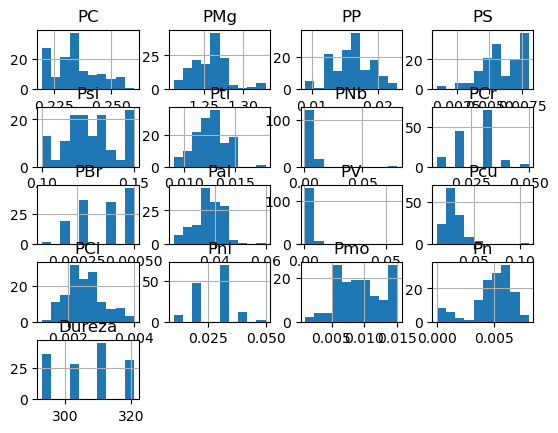

In [4]:
datos.hist()
plt.show()

## **5. Distribucion de clases**

In [6]:
# Numero de registros por especie de iris
print(datos.groupby('Dureza').size())

Dureza
293    36
302    28
311    45
321    31
dtype: int64


## **6. Separación de datos, para entrenamiento y test**

In [7]:
x = datos.drop(['Dureza'], axis = 1)
y = datos['Dureza']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=5, train_size=0.8)

## **7. Entrenamiento de árbol de decisión**

In [40]:
# Crear el obj árbol de decisión
# HIPERPARAMETRO
#=========
# Indice de impuresa GINI: (criterion)
# Máxima profundidad del árbol: (max_depth)
ArbolDecision = DecisionTreeClassifier(criterion='gini', max_depth=40)

# entrenar el árbol de decision
ArbolDecision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=40)

## **Test AD**

In [41]:
ArbolDecision.score(x_test, y_test)

0.5357142857142857

## **8. Gráfica de árbol de decisión**

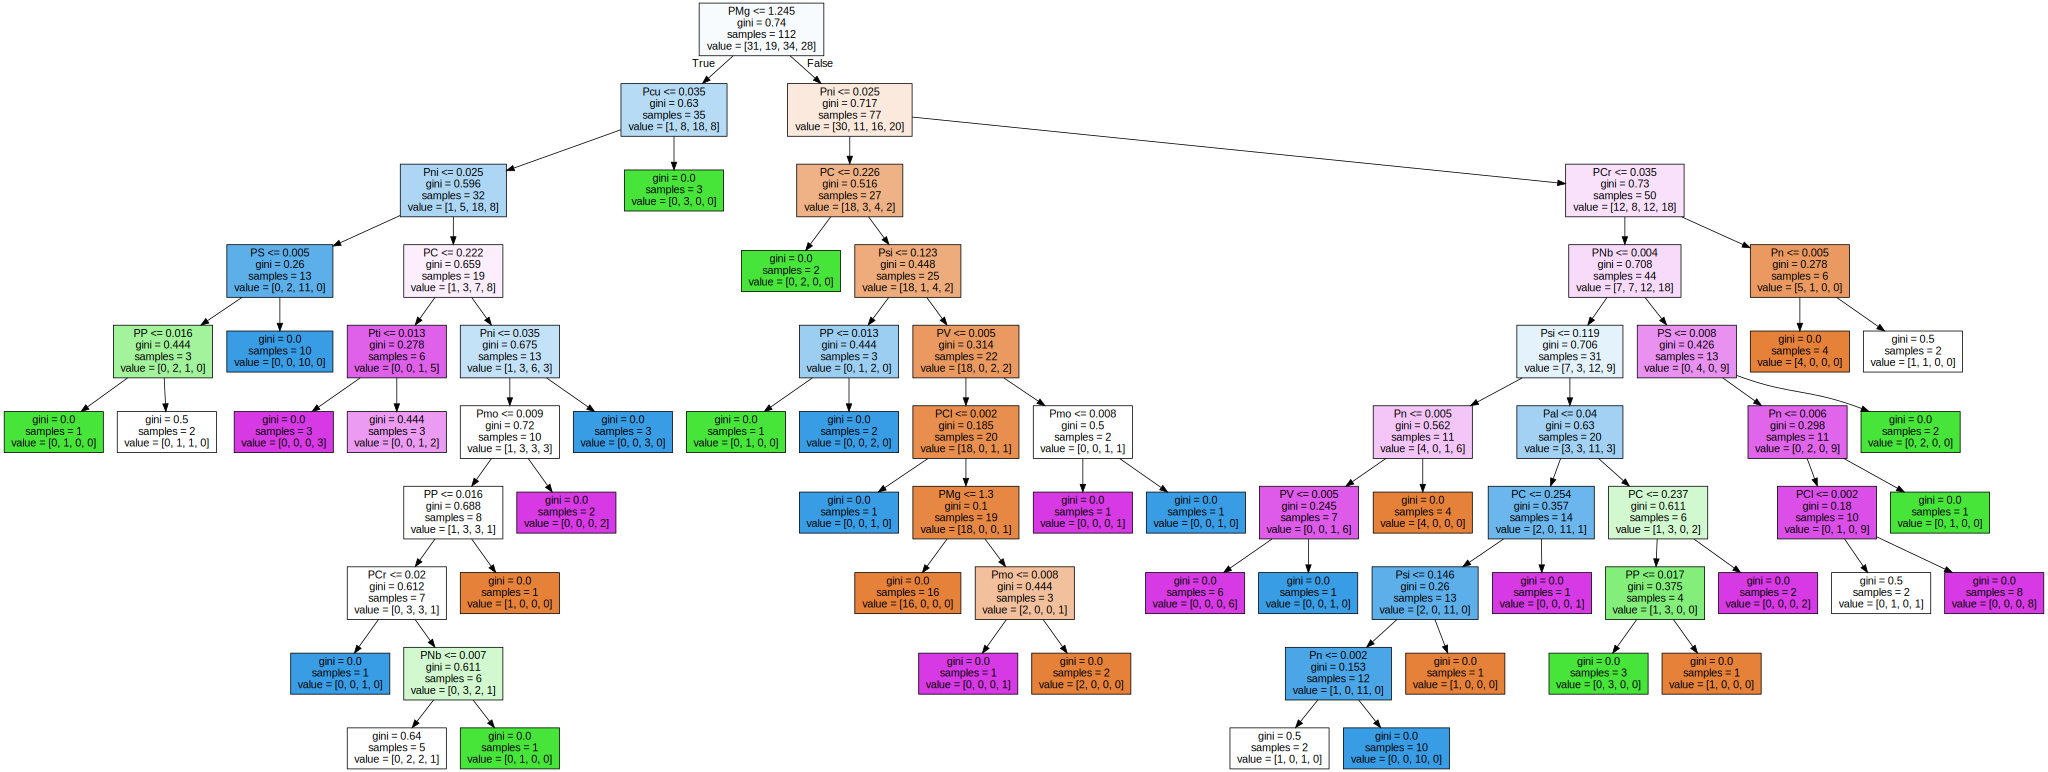

In [42]:
from sklearn.tree import export_graphviz
from graphviz import Source # conda install -c conda-forge python-graphviz
from IPython.display import SVG

graph = Source(export_graphviz(ArbolDecision, feature_names=x.columns, filled=True))
SVG(graph.pipe(format='svg'))

## **9. Test**

In [43]:
pred = ArbolDecision.predict(x_test)
print(pred)
print(y_test)

[302 302 311 311 293 302 311 302 311 293 311 321 311 293 293 302 302 311
 321 311 293 311 311 311 293 311 311 311]
43     302
60     302
48     302
117    321
54     302
66     311
94     311
23     293
89     311
25     293
102    311
21     293
75     311
40     302
12     293
50     302
10     293
111    321
109    321
74     311
90     311
107    311
108    311
53     302
46     302
52     302
70     311
98     311
Name: Dureza, dtype: int64


## **10. Matriz de confusión y métricas**

In [44]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[2 2 0 1]
 [3 3 3 0]
 [1 1 9 0]
 [0 0 2 1]]
Exactitud =  0.5357142857142857


## **11. Prediccion**

In [47]:
nuevo = np.array([[0.25, 1.24, 0.017, 0.003, 0.14, 0.013, 0.002, 0.01, 0.0006, 0.027, 0.001, 0.01, 0.0022, 0.01, 0.003, 0.0064]])

pred = ArbolDecision.predict(nuevo)
print(pred)

[302]


c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
